In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("RT_IOT2022.csv")
df

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.0,38667.0,1883.0,tcp,mqtt,32.011598,9.0,5.0,3.0,3.0,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
1,1.0,51143.0,1883.0,tcp,mqtt,31.883584,9.0,5.0,3.0,3.0,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
2,2.0,44761.0,1883.0,tcp,mqtt,32.124053,9.0,5.0,3.0,3.0,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
3,3.0,60893.0,1883.0,tcp,mqtt,31.961063,9.0,5.0,3.0,3.0,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
4,4.0,51087.0,1883.0,tcp,mqtt,31.902362,9.0,5.0,3.0,3.0,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123113,2006.0,59247.0,64623.0,tcp,-,0.000007,1.0,1.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123114,2007.0,59247.0,64680.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123115,2008.0,59247.0,65000.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123116,2009.0,59247.0,65129.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN


In [3]:
df.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.0,38667.0,1883.0,tcp,mqtt,32.011598,9.0,5.0,3.0,3.0,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
1,1.0,51143.0,1883.0,tcp,mqtt,31.883584,9.0,5.0,3.0,3.0,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
2,2.0,44761.0,1883.0,tcp,mqtt,32.124053,9.0,5.0,3.0,3.0,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
3,3.0,60893.0,1883.0,tcp,mqtt,31.961063,9.0,5.0,3.0,3.0,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
4,4.0,51087.0,1883.0,tcp,mqtt,31.902362,9.0,5.0,3.0,3.0,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish


In [4]:
df.tail()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
123113,2006.0,59247.0,64623.0,tcp,-,0.000007,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123114,2007.0,59247.0,64680.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123115,2008.0,59247.0,65000.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123116,2009.0,59247.0,65129.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.size

10465030

In [6]:
df.shape

(123118, 85)

In [7]:
df.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

In [8]:
df.dtypes

Unnamed: 0              float64
id.orig_p               float64
id.resp_p               float64
proto                    object
service                  object
                         ...   
idle.std                float64
fwd_init_window_size    float64
bwd_init_window_size    float64
fwd_last_window_size    float64
Attack_type              object
Length: 85, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123118 entries, 0 to 123117
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  float64
 1   id.orig_p                 123117 non-null  float64
 2   id.resp_p                 123117 non-null  float64
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  float64
 7   bwd_pkts_tot              123117 non-null  float64
 8   fwd_data_pkts_tot         123117 non-null  float64
 9   bwd_data_pkts_tot         123117 non-null  float64
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [10]:
df.describe()

,Unnamed: 0,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000
mean,37035.089248,34639.258738,1014.305092,3.809566,2.268826,1.909509,1.471218,0.820260,3.518063e+05,3.517620e+05,...,1.481354e+05,2.353599e+04,1.616655e+06,1.701956e+06,3.517644e+06,1.664985e+06,4.550183e+04,6118.905123,2739.776018,751.647514
std,30459.106367,19070.620354,5256.371994,130.005408,22.336565,33.018311,19.635196,32.293948,3.707645e+05,3.708015e+05,...,1.613007e+06,1.477935e+06,8.809396e+06,9.252337e+06,1.229508e+08,9.007064e+06,1.091361e+06,18716.313861,10018.848534,6310.183843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,6059.000000,17702.000000,21.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.454354e+01,7.288927e+01,...,9.536740e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
50%,33100.000000,37221.000000,21.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,4.053116e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
75%,63879.000000,50971.000000,21.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,5.006790e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000
max,94658.000000,65535.000000,65389.000000,21728.335578,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


In [11]:
#details of object type columns
df.describe(include=['object'])

,proto,service,Attack_type
count,123117,123117,123117
unique,3,10,12
top,tcp,-,DOS_SYN_Hping
freq,110427,102861,94659


In [12]:

df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Unnamed: 0              1
id.orig_p               1
id.resp_p               1
proto                   1
service                 1
                       ..
idle.std                1
fwd_init_window_size    1
bwd_init_window_size    1
fwd_last_window_size    1
Attack_type             1
Length: 85, dtype: int64

In [14]:
# Fill missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # Numerical columns
        df[col] = df[col].fillna(df[col].median())  # Using median
    else:  # Categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])  # Using mode


In [15]:
df.isnull().sum()

Unnamed: 0              0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

In [16]:

df.drop(columns=['Unnamed: 0'], inplace=True)
df

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667.0,1883.0,tcp,mqtt,32.011598,9.0,5.0,3.0,3.0,0.281148,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
1,51143.0,1883.0,tcp,mqtt,31.883584,9.0,5.0,3.0,3.0,0.282277,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
2,44761.0,1883.0,tcp,mqtt,32.124053,9.0,5.0,3.0,3.0,0.280164,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
3,60893.0,1883.0,tcp,mqtt,31.961063,9.0,5.0,3.0,3.0,0.281593,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
4,51087.0,1883.0,tcp,mqtt,31.902362,9.0,5.0,3.0,3.0,0.282111,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240.0,26847.0,502.0,MQTT_Publish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123113,59247.0,64623.0,tcp,-,0.000007,1.0,1.0,0.0,0.0,144631.172414,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123114,59247.0,64680.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,167772.160000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123115,59247.0,65000.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,167772.160000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN
123116,59247.0,65129.0,tcp,-,0.000006,1.0,1.0,0.0,0.0,167772.160000,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1024.0,0.0,1024.0,NMAP_XMAS_TREE_SCAN


In [17]:
print(df['Attack_type'].unique())

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


In [18]:
print(df['Attack_type'].value_counts())

Attack_type
DOS_SYN_Hping                 94660
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


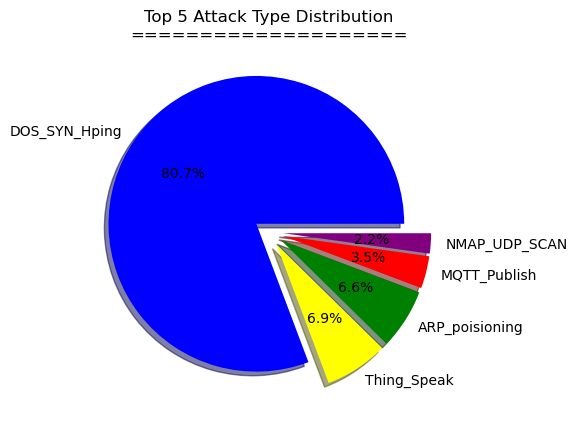

In [19]:
# Class distribution of Attack_type - Pie Chart (Top 5 values)
top_5_attacks = df['Attack_type'].value_counts().nlargest(5)  # Get top 5 attack types

#plt.figure(figsize=(8, 8))
plt.pie(top_5_attacks, 
        labels=top_5_attacks.index, 
        autopct='%1.1f%%', 
        colors=['Blue', 'Yellow', 'Green', 'Red', 'Purple'],  # Ensure enough colors
        shadow=True, 
        explode=[0.1] * len(top_5_attacks))  # Explode effect for all slices

plt.title('Top 5 Attack Type Distribution\n====================')
plt.show()

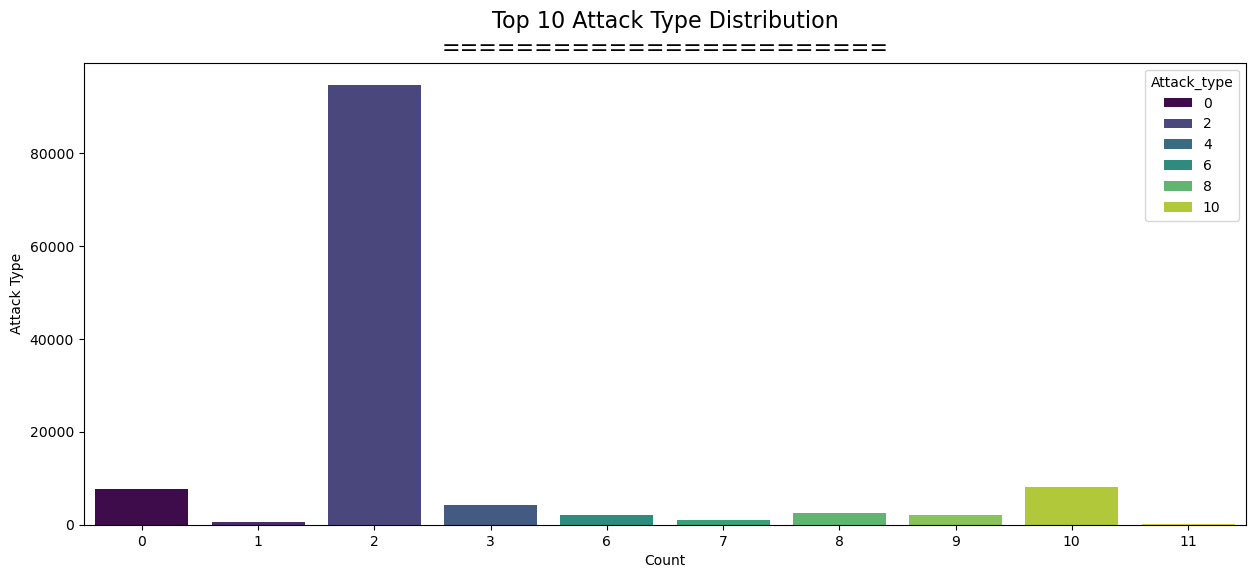

In [112]:

# Class distribution of Attack_type - Bar Chart (Top 10 values)
top_10_attacks = df['Attack_type'].value_counts().nlargest(10)  # Get top 10 attack types

plt.figure(figsize=(15, 6))
sns.barplot(x=top_10_attacks.index, y=top_10_attacks.values,hue=top_10_attacks.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Top 10 Attack Type Distribution\n========================',fontsize=16)
plt.show()


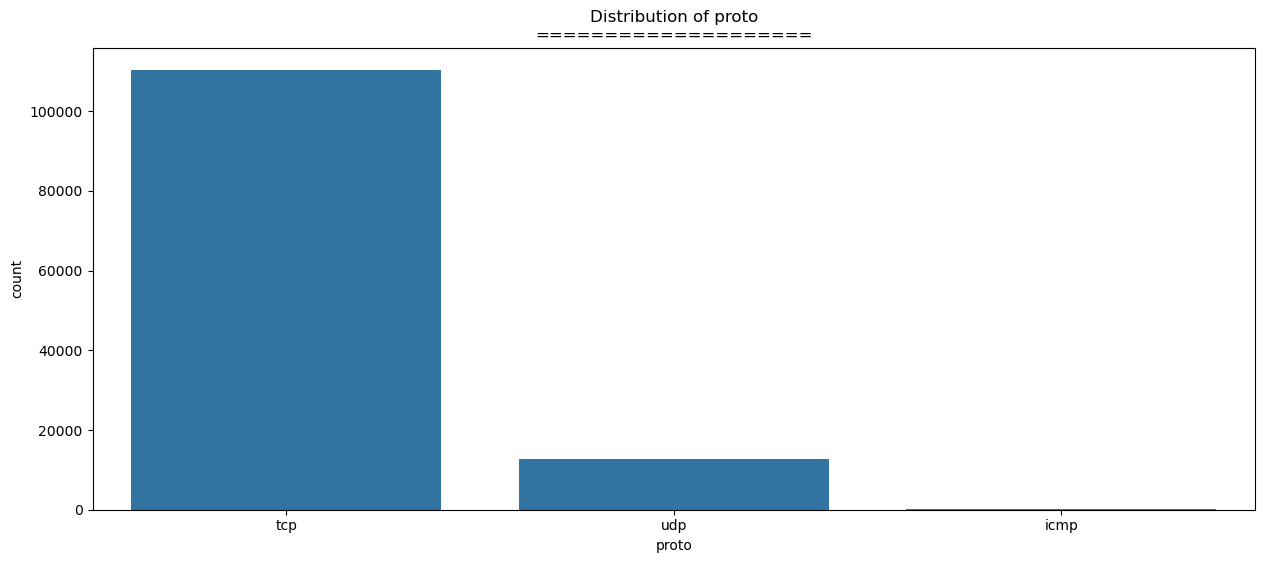

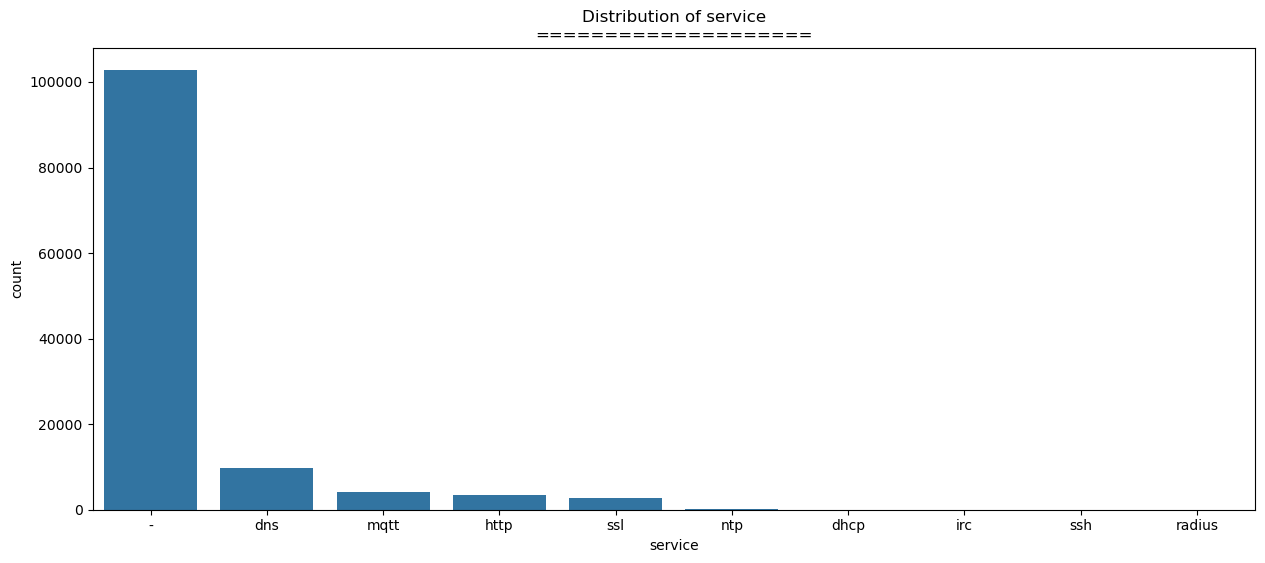

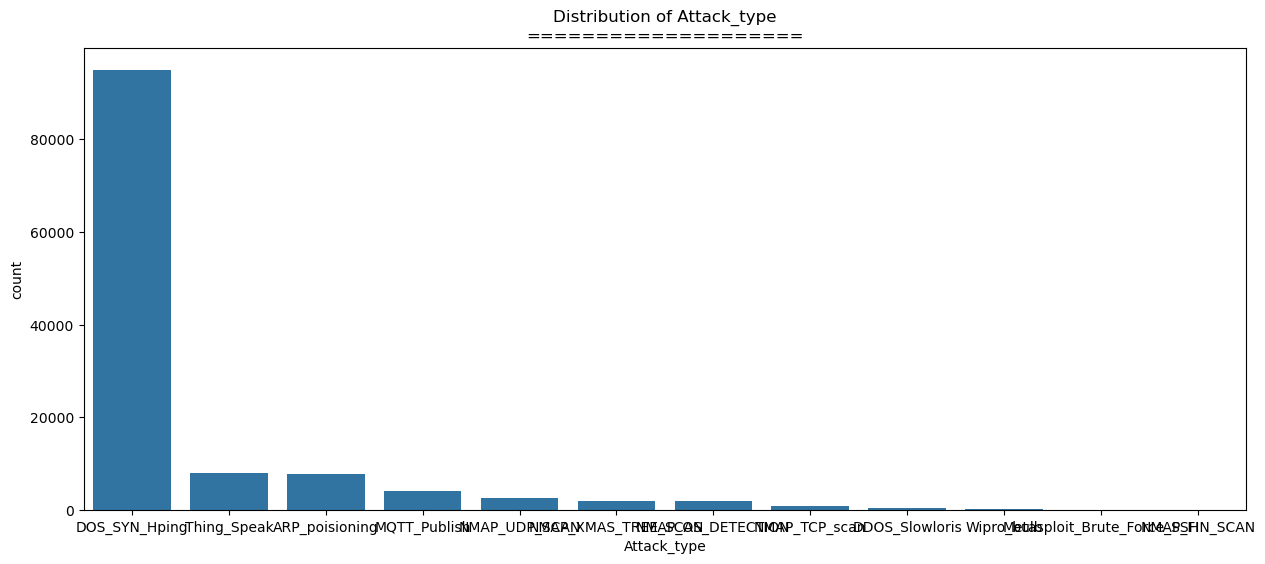

In [21]:
# Distribution of categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}\n====================')
    plt.show()


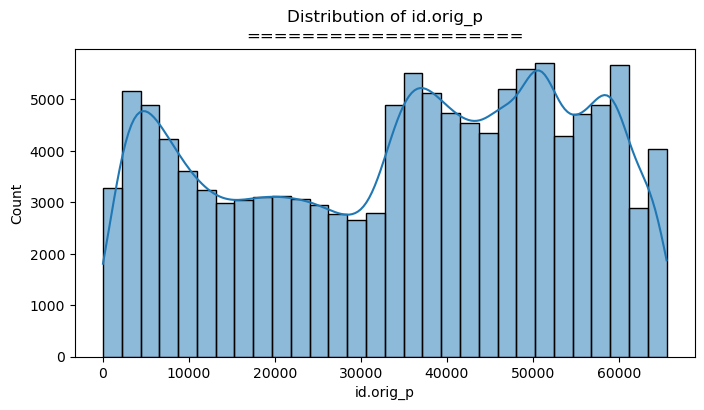

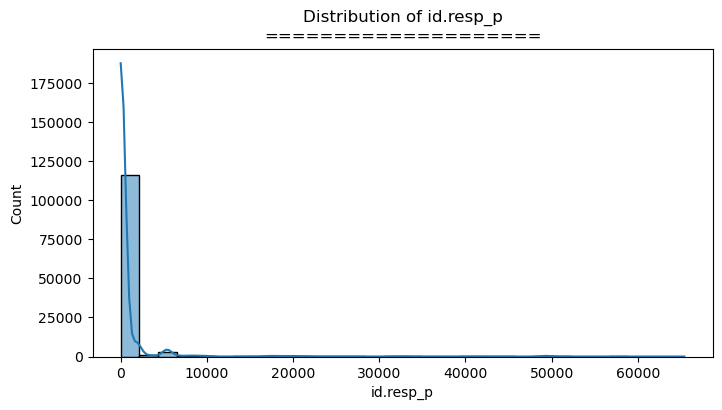

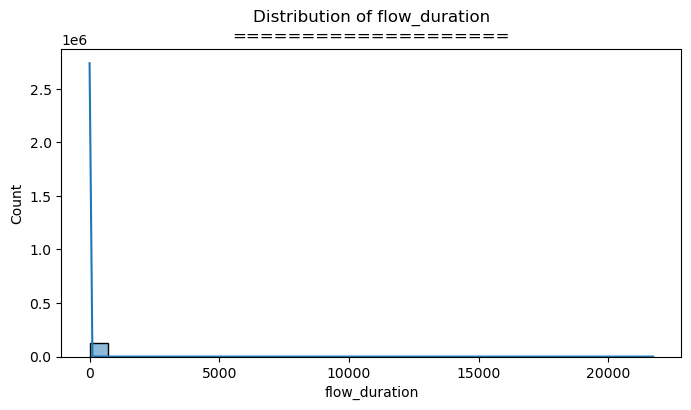

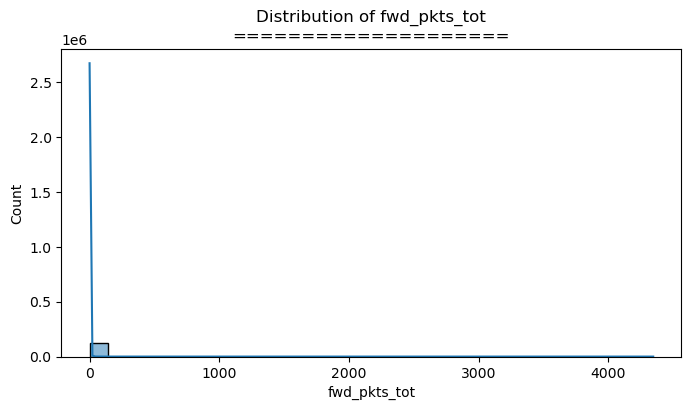

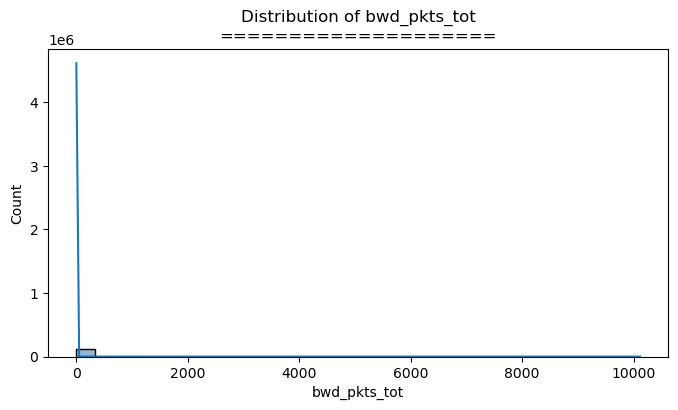

In [22]:
# Histogram of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols[:5]:  # Limiting to first 5 for efficiency
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}\n====================')
    plt.show()


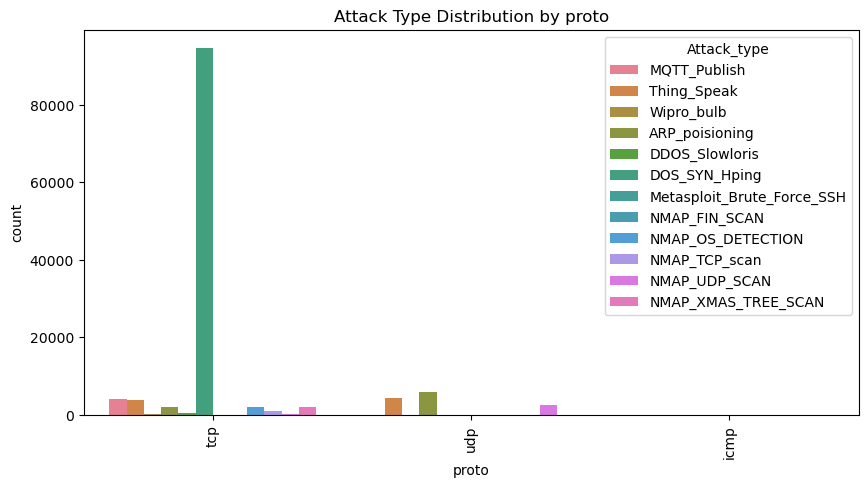

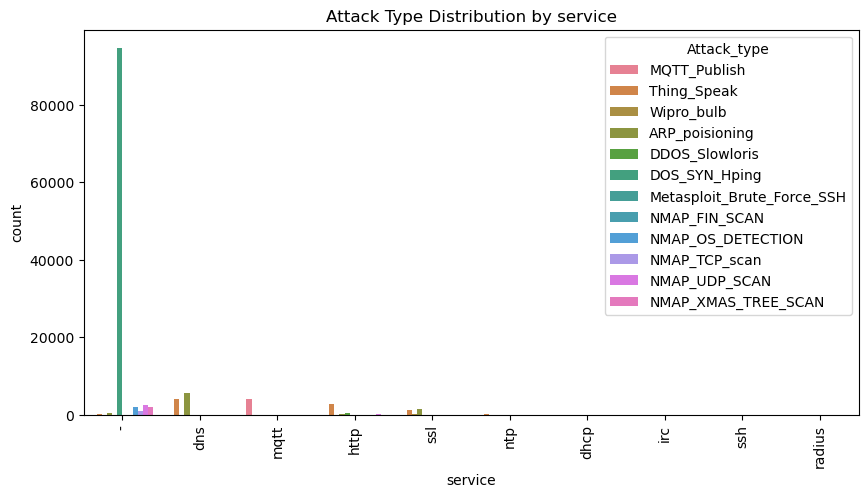

In [23]:
# Comparison of Attack_type with categorical features
categorical_features_to_compare = ['proto', 'service']  # Modify based on available columns
for col in categorical_features_to_compare:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='Attack_type', data=df, order=df[col].value_counts().index)
        plt.xticks(rotation=90)
        plt.title(f'Attack Type Distribution by {col}')
        plt.show()
    

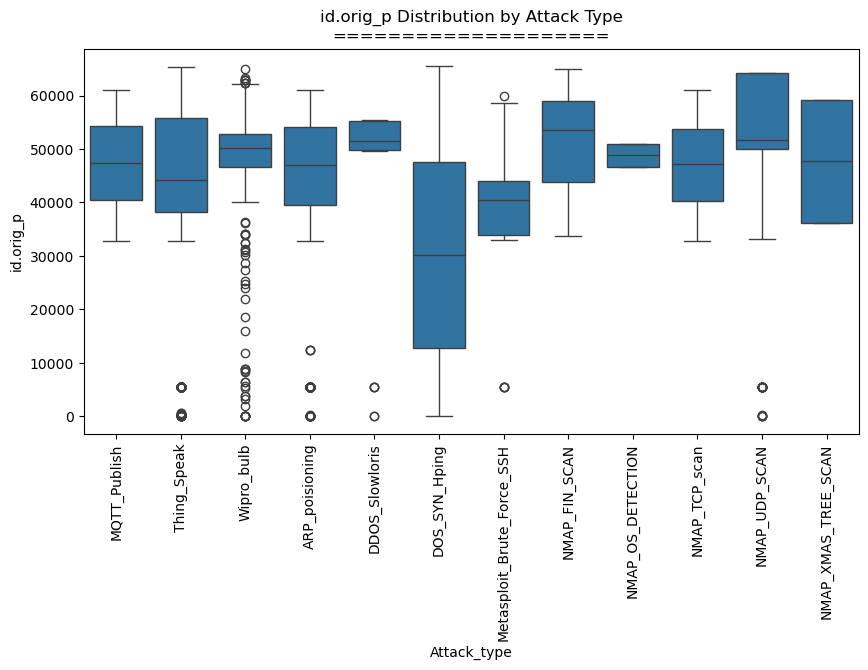

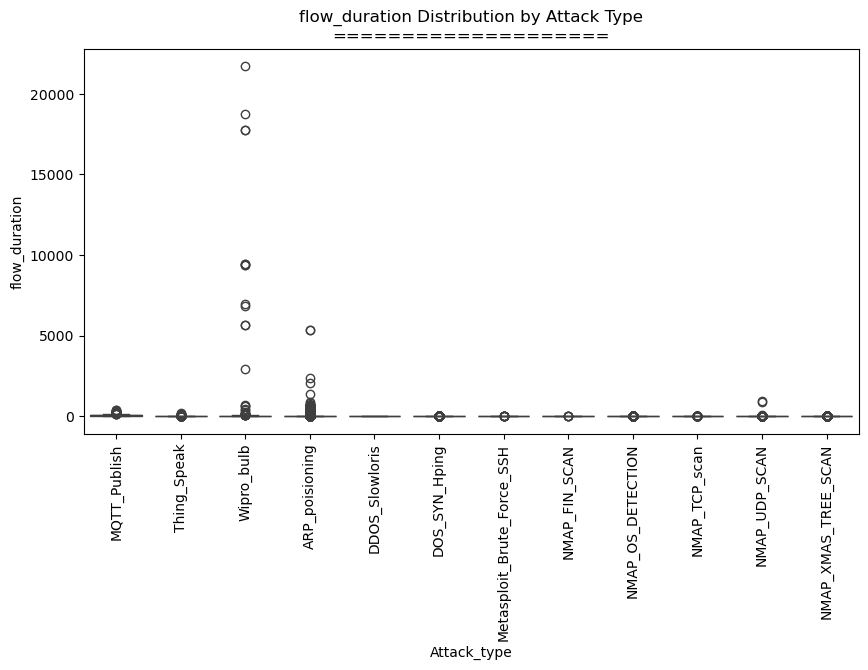

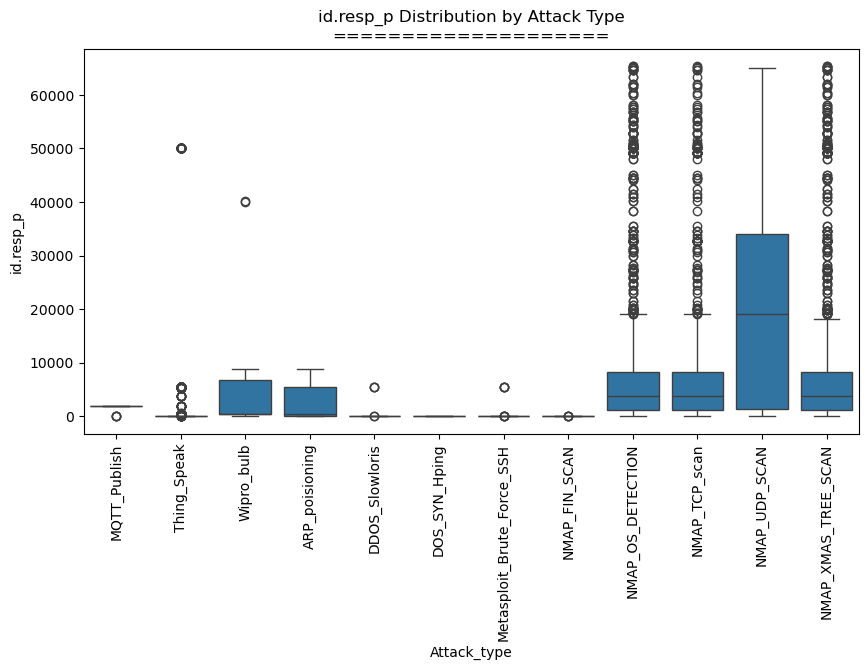

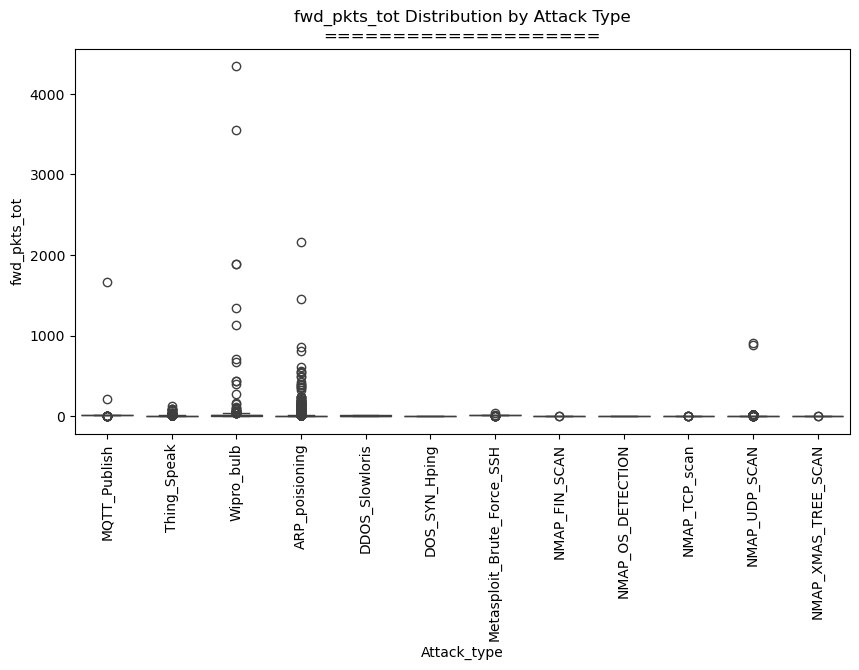

In [24]:
# Comparison of Attack_type with numerical features
numerical_features_to_compare = ['id.orig_p', 'flow_duration', 'id.resp_p', 'fwd_pkts_tot']  # Modify as needed
for col in numerical_features_to_compare:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x='Attack_type', y=col, data=df)
        plt.xticks(rotation=90)
        plt.title(f'{col} Distribution by Attack Type\n====================')
        plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Make a safe copy to avoid SettingWithCopyWarning
df = df.copy()

# 1. Select numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# 2. Compute IQR bounds
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Count outliers before clipping
print(" Outliers BEFORE clipping:\n====================")
for col in numeric_columns:
    num_outliers = ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col])).sum()
    print(f"{col}: {num_outliers} outliers")

# 4. Clip the outliers
for col in numeric_columns:
    df.loc[:, col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# 5. Count clipped values
print("\n✂️ Values clipped:\n====================")
for col in numeric_columns:
    clipped = ((df[col] == lower_bound[col]) | (df[col] == upper_bound[col])).sum()
    print(f"{col}: {clipped} values clipped")

# 6. Show the clipped DataFrame
print("\n🧾 DataFrame after clipping:\n====================")
display(df.head())  # Use print(df.head()) if not in Jupyter or IPython


📊 Outliers BEFORE clipping:
id.orig_p: 0 outliers
id.resp_p: 28452 outliers
flow_duration: 19171 outliers
fwd_pkts_tot: 17662 outliers
bwd_pkts_tot: 32364 outliers
fwd_data_pkts_tot: 24161 outliers
bwd_data_pkts_tot: 17520 outliers
fwd_pkts_per_sec: 0 outliers
bwd_pkts_per_sec: 0 outliers
flow_pkts_per_sec: 0 outliers
down_up_ratio: 25796 outliers
fwd_header_size_tot: 24422 outliers
fwd_header_size_min: 22417 outliers
fwd_header_size_max: 24411 outliers
bwd_header_size_tot: 33148 outliers
bwd_header_size_min: 32065 outliers
bwd_header_size_max: 33137 outliers
flow_FIN_flag_count: 8064 outliers
flow_SYN_flag_count: 27362 outliers
flow_RST_flag_count: 27898 outliers
fwd_PSH_flag_count: 12505 outliers
bwd_PSH_flag_count: 9958 outliers
flow_ACK_flag_count: 33083 outliers
fwd_URG_flag_count: 2006 outliers
bwd_URG_flag_count: 0 outliers
flow_CWR_flag_count: 71 outliers
flow_ECE_flag_count: 72 outliers
fwd_pkts_payload.min: 28458 outliers
fwd_pkts_payload.max: 28458 outliers
fwd_pkts_payload.

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667.0,21.0,tcp,mqtt,0.000011,1.0,1.0,1.0,0.0,0.281148,...,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0,MQTT_Publish
1,51143.0,21.0,tcp,mqtt,0.000011,1.0,1.0,1.0,0.0,0.282277,...,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0,MQTT_Publish
2,44761.0,21.0,tcp,mqtt,0.000011,1.0,1.0,1.0,0.0,0.280164,...,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0,MQTT_Publish
3,60893.0,21.0,tcp,mqtt,0.000011,1.0,1.0,1.0,0.0,0.281593,...,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0,MQTT_Publish
4,51087.0,21.0,tcp,mqtt,0.000011,1.0,1.0,1.0,0.0,0.282111,...,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0,MQTT_Publish


In [26]:
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [27]:
class_counts = df["Attack_type"].value_counts()
valid_classes = class_counts[class_counts >= 10].index
df = df[df["Attack_type"].isin(valid_classes)]

In [28]:
X = df.drop(columns=["Attack_type"])
X

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667.0,21.0,1,5,0.000011,1.0,1.0,1.0,0.0,0.281148,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
1,51143.0,21.0,1,5,0.000011,1.0,1.0,1.0,0.0,0.282277,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
2,44761.0,21.0,1,5,0.000011,1.0,1.0,1.0,0.0,0.280164,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
3,60893.0,21.0,1,5,0.000011,1.0,1.0,1.0,0.0,0.281593,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
4,51087.0,21.0,1,5,0.000011,1.0,1.0,1.0,0.0,0.282111,...,11.086464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123113,59247.0,21.0,1,0,0.000007,1.0,1.0,1.0,0.0,144631.172414,...,6.914139,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
123114,59247.0,21.0,1,0,0.000006,1.0,1.0,1.0,0.0,167772.160000,...,5.960464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
123115,59247.0,21.0,1,0,0.000006,1.0,1.0,1.0,0.0,167772.160000,...,5.960464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0
123116,59247.0,21.0,1,0,0.000006,1.0,1.0,1.0,0.0,167772.160000,...,5.960464,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,64.0


In [29]:
y = df["Attack_type"]
y

0         3
1         3
2         3
3         3
4         3
         ..
123113    9
123114    9
123115    9
123116    9
123117    2
Name: Attack_type, Length: 123118, dtype: int32

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, cmap='Blues', annot=False, fmt='d')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [114]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt= dt_classifier.predict(X_test)
y_pred_d=pd.DataFrame(y_pred_dt,y_test)

In [116]:
#single value prediction
sample_input = X_test.iloc[[0]]  # Reshape for prediction

# Predict the class
predicted_class = dt_classifier.predict(sample_input)[0]
print(predicted_class)
print(f"Predicted Class: {predicted_class}")
print(f"Actual Class: {y_test.iloc[0]}")

2
Predicted Class: 2
Actual Class: 2


In [118]:
accuracy_dt = accuracy_score(y_test, y_pred_d)
print("ACCURACY",accuracy_dt)

ACCURACY 0.9956140350877193


In [36]:
cm_dt = confusion_matrix(y_test, y_pred_d)
print("CONFUSION MATRIX\n====================",cm_dt)

CONFUSION MATRIX
==================== [[ 1513     0     1     1     0     0     0     1     2     0    32     0]
 [    0   106     0     0     0     0     0     0     0     0     1     0]
 [    6     0 18920     2     0     2     0     0     0     0     1     1]
 [    0     0     0   827     1     0     0     0     0     0     1     0]
 [    0     0     0     0     5     0     0     0     0     0     2     0]
 [    1     0     2     0     0     3     0     0     0     0     0     0]
 [    0     0     0     0     0     0   400     0     0     0     0     0]
 [    0     0     0     0     0     0     0   200     0     0     0     0]
 [    1     0     0     0     0     0     0     0   515     0     2     0]
 [    1     0     0     0     0     0     0     0     0   400     1     0]
 [   33     0     0     0     0     0     0     0     0     0  1587     2]
 [    2     0     2     0     1     0     0     0     0     0     5    41]]


In [37]:
print("CLASSIFICATION REPORT OF DECISION TREE\n====================")
print(classification_report(y_test,y_pred_d))

CLASSIFICATION REPORT OF DECISION TREE
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1550
           1       1.00      0.99      1.00       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       0.71      0.71      0.71         7
           5       0.60      0.50      0.55         6
           6       1.00      1.00      1.00       400
           7       1.00      1.00      1.00       200
           8       1.00      0.99      1.00       518
           9       1.00      1.00      1.00       402
          10       0.97      0.98      0.98      1622
          11       0.93      0.80      0.86        51

    accuracy                           1.00     24624
   macro avg       0.93      0.91      0.92     24624
weighted avg       1.00      1.00      1.00     24624



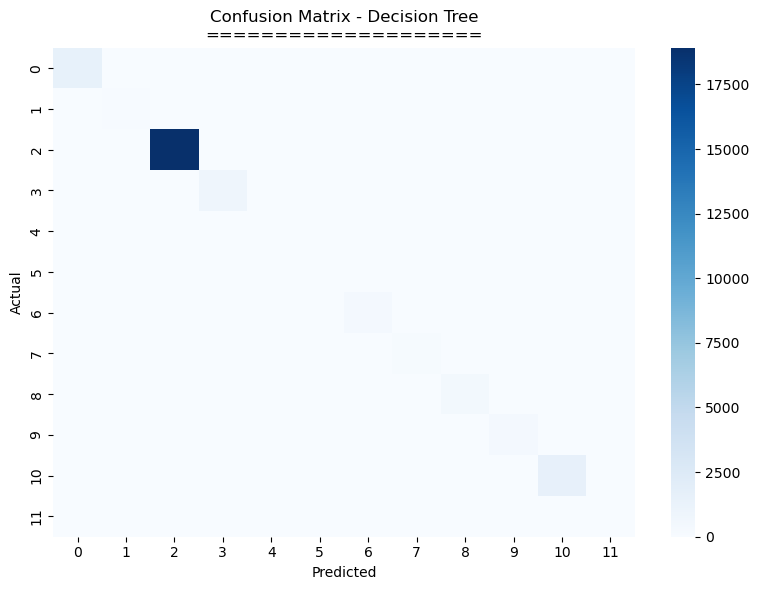

In [38]:
plot_confusion_matrix(y_test, y_pred_d, "Decision Tree\n====================")

In [122]:
rf_classifier = RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_r=pd.DataFrame(y_pred_rf,y_test)
y_pred_r

,0
Attack_type,
2,2
2,2
10,10
2,2
2,2
...,...
10,10
2,2
2,2


In [124]:
#single value prediction
sample_input = X_test.iloc[[0]]  # Reshape for prediction

# Predict the class
predicted_class = rf_classifier.predict(sample_input)[0]
print(predicted_class)
print(f"Predicted Class: {predicted_class}")
print(f"Actual Class: {y_test.iloc[0]}")

2
Predicted Class: 2
Actual Class: 2


In [125]:
#accuracy score and confusion matrix
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.9955734243014944


In [126]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[ 1530     0     1     0     0     0     0     1     1     0    17     0]
 [    0   107     0     0     0     0     0     0     0     0     0     0]
 [    6     0 18919     2     0     3     0     0     0     0     1     1]
 [    1     0     0   827     0     0     0     0     0     0     1     0]
 [    1     0     0     0     6     0     0     0     0     0     0     0]
 [    1     0     2     0     0     3     0     0     0     0     0     0]
 [    0     0     0     0     0     0   398     2     0     0     0     0]
 [    0     0     0     0     0     0    12   179     0     9     0     0]
 [    1     0     0     0     0     0     0     0   514     0     3     0]
 [    1     0     0     0     0     0     1     0     0   399     1     0]
 [   31     0     0     0     0     0     0     0     0     0  1591     0]
 [    2     0     2     0     0     0     0     0     0     0     5    42]]


In [128]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1550
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00     18932
           3       1.00      1.00      1.00       829
           4       1.00      0.86      0.92         7
           5       0.50      0.50      0.50         6
           6       0.97      0.99      0.98       400
           7       0.98      0.90      0.94       200
           8       1.00      0.99      1.00       518
           9       0.98      0.99      0.99       402
          10       0.98      0.98      0.98      1622
          11       0.98      0.82      0.89        51

    accuracy                           1.00     24624
   macro avg       0.95      0.92      0.93     24624
weighted avg       1.00      1.00      1.00     24624



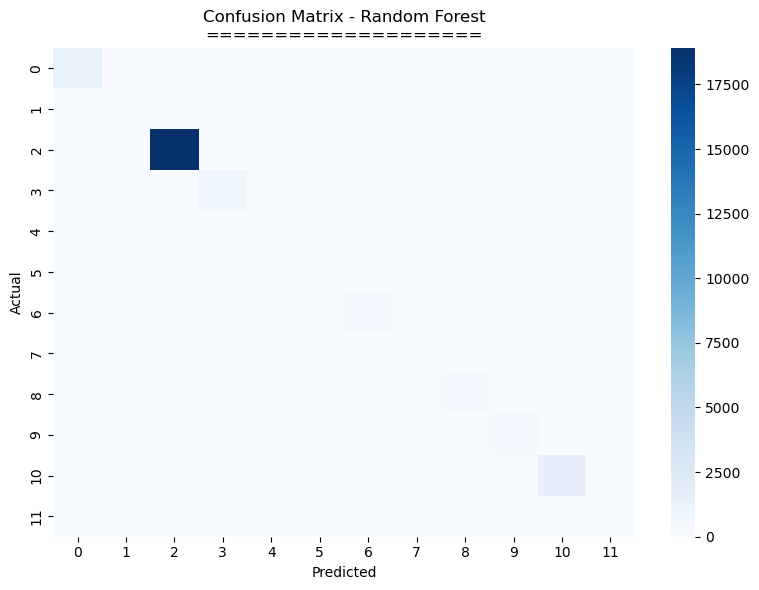

In [133]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest\n====================")

In [134]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
logreg_preds = logreg_model.predict(X_test_scaled)

In [135]:
# Get the first row as a DataFrame (keeps column names)
single_sample_df = X_test.iloc[[0]]  # Note the double brackets!

# Now scale safely
scaled_input = scaler.transform(single_sample_df)

# Predict
predicted_class = logreg_model.predict(scaled_input)
print(f"Predicted Class: {predicted_class[0]}")
print(f"Actual Class: {y_test.iloc[0]}")

Predicted Class: 2
Actual Class: 2


In [137]:
#accuracy score and confusion matrix
accuracy_lr = accuracy_score(y_test, logreg_preds)

print(accuracy_lr)

0.9574398960363872


In [138]:
cm_lr = confusion_matrix(y_test, logreg_preds)
print(cm_lr)

[[ 1177     5    19     0     0     0     1     0     0    12   336     0]
 [   20    55     0     0     0     0     0     0     0     0    32     0]
 [    0     0 18932     0     0     0     0     0     0     0     0     0]
 [    1     0     2   825     0     0     0     0     0     0     1     0]
 [    1     0     0     0     0     0     0     0     0     0     6     0]
 [    0     0     5     0     0     0     0     0     0     0     1     0]
 [    0     0     0     0     0     0   177    55     0   168     0     0]
 [    0     0     0     0     0     0    71   103     0    26     0     0]
 [   13     2     1     0     0     0     0     0   485     0    17     0]
 [    0     0     2     0     0     0   121    35     0   242     2     0]
 [   15     1     8     2     0     0     0     0    15     1  1580     0]
 [    0     0     2     0     0     0     0     0     2     2    45     0]]


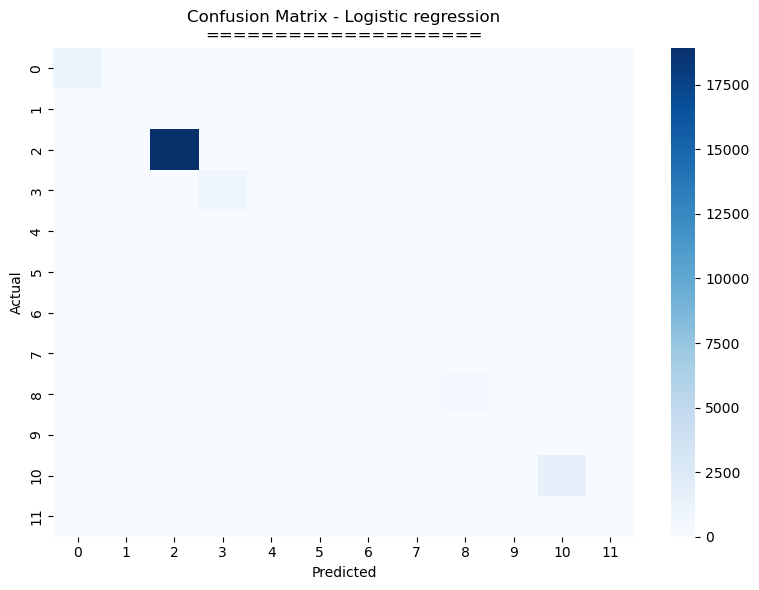

In [139]:
plot_confusion_matrix(y_test, logreg_preds, "Logistic regression\n====================")

In [140]:
# Support Vector Classifier
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can tune these parameters
svc_model.fit(X_train_scaled, y_train)
svc_preds = svc_model.predict(X_test_scaled)

In [141]:
# Get the first row as a DataFrame (keeps column names)
single_sample_df = X_test.iloc[[0]]  # Note the double brackets!

# Now scale safely
scaled_input = scaler.transform(single_sample_df)

# Predict
predicted_class = svc_model.predict(scaled_input)
print(f"Predicted Class: {predicted_class[0]}")
print(f"Actual Class: {y_test.iloc[0]}")

Predicted Class: 2
Actual Class: 2


In [142]:
acc_svm=accuracy_score(y_test, svc_preds)
print("Accuracy:",acc_svm )

Accuracy: 0.9693794671864847


In [143]:
print(confusion_matrix(y_test, svc_preds))

[[ 1267     4    19     0     0     0     1     0     0    19   239     1]
 [    1   102     0     0     0     0     0     0     0     0     4     0]
 [    0     0 18932     0     0     0     0     0     0     0     0     0]
 [    1     0     2   825     0     0     0     0     0     0     1     0]
 [    1     0     0     0     0     0     0     0     0     0     6     0]
 [    0     0     5     0     0     0     0     0     0     0     1     0]
 [    0     0     0     0     0     0   238    98     0    64     0     0]
 [    0     0     0     0     0     0    13   170     0    17     0     0]
 [    1    24     1     0     0     0     0     0   485     0     7     0]
 [    0     0     2     0     0     0    97    46     0   255     2     0]
 [   24     0     0     0     0     0     0     0    13     2  1583     0]
 [   14     5     4     1     0     0     0     0     0     2    12    13]]


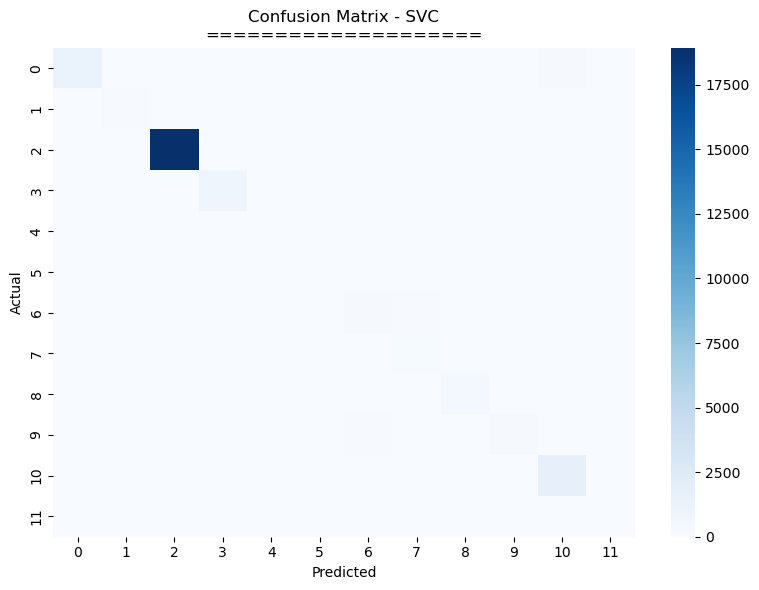

In [144]:
plot_confusion_matrix(y_test, svc_preds, "SVC\n====================")

In [145]:
# Find the best model
best_model = max(
    [('Decision Tree', accuracy_dt),
     ('Random Forest', accuracy_rf),
     ('SVM', acc_svm),
    ('Logistic Regression', accuracy_lr)], key=lambda x: x[1])

print(f"\nBest performing model: {best_model[0]} with accuracy {best_model[1]:.4f}")



Best performing model: Decision Tree with accuracy 0.9956
